# <font color='#1a5276'> <b> <center> CLASSIFICATION METRICS </center> </b> </font>

## <b> <font color='blue'> Table of Contents </font> </b>

1. [Introduction](#1)  
2. [Setup](#2)  
3. [Binary classification](#3)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.1. [Data](#3.1)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.2. [Manual calculation](#3.2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.1. [Accuracy](#3.2.1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.2. [Precision](#3.2.2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.3. [Recall](#3.2.3)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.4. [False Positive Rate](#3.2.4)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.5. [F1-score](#3.2.5)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.6. [F05-score](#3.2.6)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.7. [F2-score](#3.2.7)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.8. [Precision-Recall curve](#3.2.8)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.9. [ROC Curve](#3.2.9)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.3. [Calculation using ScikitLearn](#3.3)  
4. [Multiclass classification](#4)  
&nbsp;&nbsp;&nbsp;&nbsp; 4.1. [Data](#4.1)  
&nbsp;&nbsp;&nbsp;&nbsp; 4.2. [Metrics](#4.2)  
5. [References](#references)  

<a name="1"></a>
## <font color='blue'> 1. Introduction </font>

This notebook provides a practical guide to evaluating classification models using key performance metrics. It covers essential metrics for binary classification, such as accuracy, precision, recall, F1-score, and ROC-AUC, before generalizing them to multiclass problems.

<a name="2"></a>
## <font color='blue'> 2. Setup </font>

In [104]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, confusion_matrix, 
    ConfusionMatrixDisplay, f1_score, fbeta_score
)
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<a name="3"></a>
## <font color='blue'> 3. Binary Classification </font>

<a name="3.1"></a>
### <font color='#2874a6'> 3.1. Data </font>

- First, we will simulate a model's output.

- Then, we will pass this output through a sigmoid to obtain probabilities.

- We will use a threshold to assign a class (positive or negative).

- In a later section, we will calculate the metrics using the predicted and true values.


In [105]:
# simulate true labels
y_true = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1])  # True labels

# simulate model output
model_output = np.array([-2.5, 1.5, 2.3, -0.8, 0.9, 0.7, 0.75, 0.2, -0.1, 0.9]) 

In [106]:
# Apply sigmoid to model output to get probabilities
model_output_probabilities = 1 / (1 + np.exp(-model_output))
model_output_probabilities

array([0.07585818, 0.81757448, 0.90887704, 0.31002552, 0.7109495 ,
       0.66818777, 0.6791787 , 0.549834  , 0.47502081, 0.7109495 ])

In [107]:
def apply_threshold(probs, threshold=0.5):
    return (probs >= threshold).astype(int)

# apply threshold
y_pred = apply_threshold(model_output_probabilities,0.5)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

<a name="3.2"></a>
### <font color='#2874a6'> 3.2. Manual calculation </font>

We will implement metrics from scratch to understand their computation.

In [108]:
# calculate true positives, true negatives, false positives and false negatives
# this gives the confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    # Initialize counts for TP, TN, FP, FN
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    return tp, tn, fp, fn

In [109]:
tp, tn, fp, fn = calculate_confusion_matrix(y_true, y_pred)
tp, tn, fp, fn

(5, 2, 2, 1)

<a name="3.2.1"></a>
### <font color='black'> 3.2.1. Accuracy </font>


$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

or

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

where:

* $TP$ = True Positives (correctly predicted positive cases)
* $TN$ = True Negatives (correctly predicted negative cases)
* $FP$ = False Positives (incorrectly predicted positive cases)
* $FN$ = False Negatives (incorrectly predicted negative cases)

In [110]:
def calculate_accuracy(y_true, y_pred):
    """
    Calculate the precision of a binary classification model.

    Precision is the ratio of true positives (TP) to the sum of true positives (TP) 
    and false positives (FP), indicating the accuracy of positive predictions.

    Parameters:
    y_true (array-like): True binary labels.
    y_pred (array-like): Predicted binary labels.

    Returns:
    float: The accuracy score.
    """
    tp, tn, fp, fn = calculate_confusion_matrix(y_true, y_pred)
    return (tp + tn) / (tp + tn + fp + fn)

calculate_accuracy(y_true, y_pred)

0.7

<a name="3.2.2"></a>
### <font color='black'> 3.2.2. Precision </font>


$$
\text{Precision} = \frac{TP}{TP + FP}
$$

where:

* $TP$ = True Positives (correctly predicted positive cases)
* $FP$ = False Positives (incorrectly predicted positive cases)

In [111]:
def calculate_precision(y_true, y_pred):
    tp, _, fp, _ = calculate_confusion_matrix(y_true, y_pred)
    return tp / (tp + fp)


calculate_precision(y_true, y_pred)


0.7142857142857143

<a name="3.2.3"></a>
### <font color='black'> 3.2.3. Recall </font>


$$
\text{Recall} = \frac{TP}{TP + FN}
$$

where:

* $TP$ = True Positives (correctly predicted positive cases)
* $FN$ = False Negatives (incorrectly predicted negative cases)

In [112]:
def calculate_recall(y_true, y_pred):
    tp, _, _ , fn = calculate_confusion_matrix(y_true, y_pred)
    return tp / (tp + fn)

calculate_recall(y_true, y_pred)

0.8333333333333334

<a name="3.2.4"></a>
### <font color='black'> 3.2.4. False Positive Rate </font>


$$
\text{FPR} = \frac{FP}{FP + TN}
$$

where:

* $FP$ = False Positives (incorrectly predicted positive cases)
* $TN$ = True Negatives (correctly predicted negative cases)

In [113]:
def calculate_fpr(y_true, y_pred):
    tp, tn, fp, fn = calculate_confusion_matrix(y_true, y_pred)
    return fp / (fp + tn)

calculate_fpr(y_true, y_pred)

0.5

<a name="3.2.5"></a>
### <font color='black'> 3.2.5. F1-score </font>


$$
\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

or equivalently:

$$
\text{F1-score} = \frac{2 \times TP}{2 \times TP + FP + FN}
$$

where:

* $TP$ = True Positives
* $FP$ = False Positives
* $FN$ = False Negatives

In [114]:
def calculate_f1_score(y_true, y_pred):
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    return 2*(precision*recall)/(precision + recall)

calculate_f1_score(y_true, y_pred)

0.7692307692307692

<a name="3.2.6"></a>
### <font color='black'> 3.2.6. F05-score </font>


$$
\text{F0.5-score} = (1 + 0.5^2) \times \frac{\text{Precision} \times \text{Recall}}{(0.5^2 \times \text{Precision}) + \text{Recall}}
$$

or

$$
\text{F0.5-score} = 1.25 \times \frac{\text{Precision} \times \text{Recall}}{(0.25 \times \text{Precision}) + \text{Recall}}
$$

where:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* TP = True Positives
* FP = False Positives
* FN = False Negatives

In [115]:
def calculate_f05_score(y_true, y_pred):
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    return 1.25*(precision*recall)/(0.25*precision + recall)

calculate_f05_score(y_true, y_pred)

0.7352941176470589

<a name="3.2.7"></a>
### <font color='black'> 3.2.7. F2-score </font>


$$
\text{F2-score} = (1 + 2^2) \times \frac{\text{Precision} \times \text{Recall}}{(2^2 \times \text{Precision}) + \text{Recall}}
$$

or

$$
\text{F2-score} = 5 \times \frac{\text{Precision} \times \text{Recall}}{(4 \times \text{Precision}) + \text{Recall}}
$$

where:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* TP = True Positives
* FP = False Positives
* FN = False Negatives

In [116]:
def calculate_f2_score(y_true, y_pred):
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    return 5*(precision*recall)/(4*precision + recall)

calculate_f2_score(y_true, y_pred)

0.8064516129032258

<a name="3.2.8"></a>
### <font color='black'> 3.2.8. Precision-Recall curve </font>


We will calculate precision and recall for different thresholds and plot them against each other.

In [117]:
def precisions_recalls_curve(y_true, probabilities, thresholds):
    preds = []
    recalls = []
    
    for t in thresholds:
        # apply the threshold
        y_pred = apply_threshold(probabilities, t)
        # calculate important data
        tp, tn, fp, fn = calculate_confusion_matrix(y_true, y_pred)
        # calculate precision and recall and append them to the corresponding list
        preds.append(tp/(tp + fp))
        recalls.append(tp/(tp + fn))
        
    return preds, recalls

In [118]:
thresholds = [0.2, 0.25, 0.35, 0.4, 0.45, 0.5, 0.6, 0.65, 0.7, 0.85, 0.9]

preds, recalls = precisions_recalls_curve(y_true, model_output_probabilities, thresholds)

In [126]:
preds

[0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.75,
 0.7142857142857143,
 0.6666666666666666,
 0.6666666666666666,
 1.0,
 1.0,
 1.0]

In [128]:
recalls

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.16666666666666666,
 0.16666666666666666]

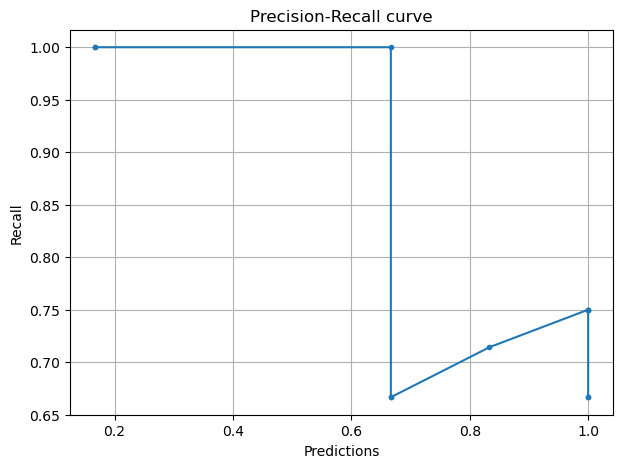

In [120]:
plt.figure(figsize=(7, 5))
plt.plot(recalls, preds, marker='.')
plt.xlabel('Predictions')
plt.ylabel('Recall')
plt.title('Precision-Recall curve')
plt.grid()
plt.show()

<a name="3.2.9"></a>
### <font color='black'> 3.2.9. ROC Curve </font>


In [122]:
def roc(y_true, probabilities, thresholds):
    true_positive_rates = []
    false_positive_rates = []
    
    for t in thresholds:
        # apply the threshold
        y_pred = apply_threshold(probabilities, t)
        # calculate important data
        tp, tn, fp, fn = calculate_confusion_matrix(y_true, y_pred)
        # calculate precision and recall and append them to the corresponding list
        true_positive_rates.append(tp/(tp + fn))
        false_positive_rates.append(fp/(fp + tn))
        
    return true_positive_rates, false_positive_rates

In [123]:
thresholds = [0.2, 0.25, 0.35, 0.4, 0.45, 0.5, 0.6, 0.65, 0.7, 0.85, 0.9]

true_positive_rates, false_positive_rates = roc(y_true, model_output_probabilities, thresholds)

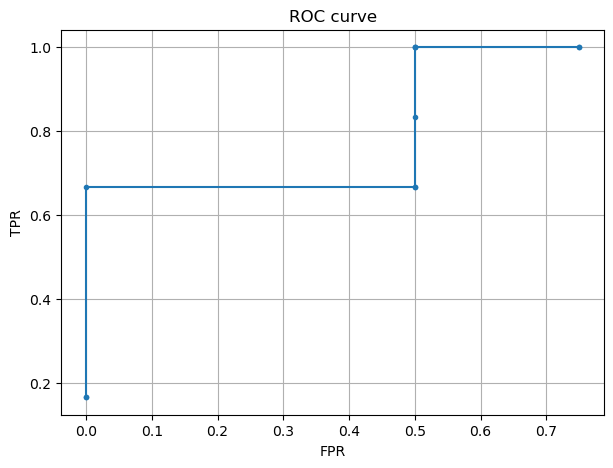

In [125]:
plt.figure(figsize=(7, 5))
plt.plot(false_positive_rates , true_positive_rates, marker='.')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.grid()
plt.show()

<a name="3.3"></a>
### <font color='#2874a6'> 3.3. Calculation using ScikitLearn </font>

### Confusion matrix

In [67]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[2, 2],
       [1, 5]])

Note that in ScikitLearn the confusion matrix is:

```
TN FP

FN TP
```

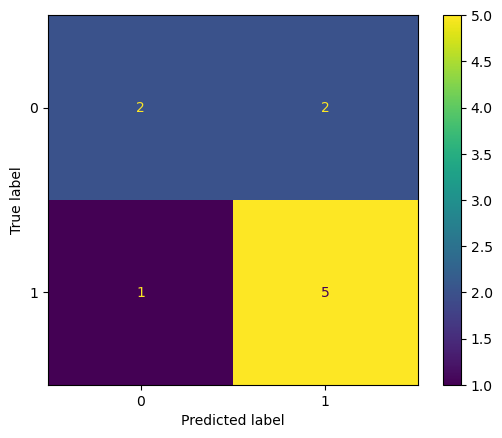

In [68]:
# display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [69]:
# ravel
cm.ravel()

array([2, 2, 1, 5])

### Metrics

In [78]:
def calculate_metrics(y_true, y_pred):
    """
    Calculate various classification metrics for binary classification.

    This function computes the following metrics based on true and predicted labels:
    - Accuracy
    - Precision
    - Recall
    - False Positive Rate (FPR)
    - F1 Score
    - F0.5 Score (F-beta with beta=0.5)
    - F2 Score (F-beta with beta=2)

    Parameters:
    y_true (array-like): True binary labels.
    y_pred (array-like): Predicted binary labels.

    Returns:
    tuple: A tuple containing the calculated metrics in the following order:
        (accuracy, precision, recall, false_positive_rate, f1_score, f0_5_score, f2_score)
    """
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    f1 = f1_score(y_true, y_pred)
    f0_5 = fbeta_score(y_true, y_pred, beta=0.5)
    f2 = fbeta_score(y_true, y_pred, beta=2)
    # return
    return accuracy, precision, recall, fpr, f1, f0_5, f2
    
    

In [79]:
accuracy, precision, recall, fpr, f1, f0_5, f2 = calculate_metrics(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"False Positive Rate (FPR): {fpr}")
print(f"F1-score: {f1}")
print(f"F0.5-score: {f0_5}")
print(f"F2-score: {f2}")

Accuracy: 0.7
Precision: 0.7142857142857143
Recall: 0.8333333333333334
False Positive Rate (FPR): 0.5
F1-score: 0.7692307692307692
F0.5-score: 0.7352941176470589
F2-score: 0.8064516129032258


### Precision-recall curve

We will use [Precision_Recall curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)


sklearn.metrics.precision_recall_curve(y_true, y_score=None, *, pos_label=None, sample_weight=None, drop_intermediate=False, probas_pred='deprecated')

The most important parameters are:

- y_true
     - array-like of shape (n_samples,)
     - True binary labels. If labels are not either {-1, 1} or {0, 1}, then pos_label should be explicitly given.

- y_score
    - array-like of shape (n_samples,)
    - Target scores, can either be probability estimates of the positive class, or non-thresholded measure of decisions (as returned by decision_function on some classifiers). For decision_function scores, values greater than or equal to zero should indicate the positive class.


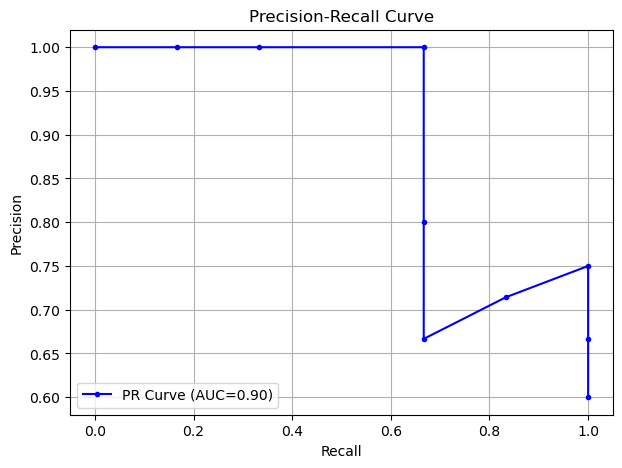

In [82]:
# Compute precision-recall curve; note that the second parameter paased are probabilities
precision, recall, thresholds = precision_recall_curve(y_true, model_output_probabilities)

# Compute AUC for reference
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

### ROC curve

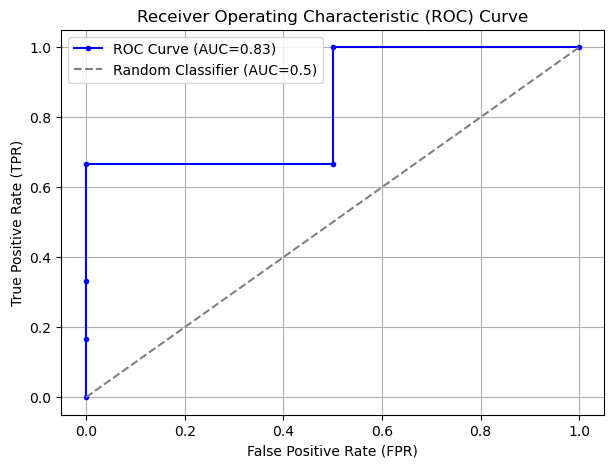

In [83]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, model_output_probabilities)

# Compute AUC for reference
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC={roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC=0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

<a name="4"></a>
## <font color='blue'> 4. Multi-class Classification </font>

<a name="4.1"></a>
### <font color='#2874a6'> 4.1. Data </font>

We will use synthetic data.

In [88]:
y_true = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [89]:
y_pred = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

<a name="4.2"></a>
### <font color='#2874a6'> 4.2. Metrics </font>

### Confusion matrix

In [93]:
# confusion matrix
computed_conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
print("Computed Confusion Matrix:")
print(computed_conf_matrix)

Computed Confusion Matrix:
[[100  20  10   5]
 [ 15  80   5  10]
 [ 10   5  90   5]
 [  5  10   5  80]]


Let's plot the confusion matrix in a more friendly way:

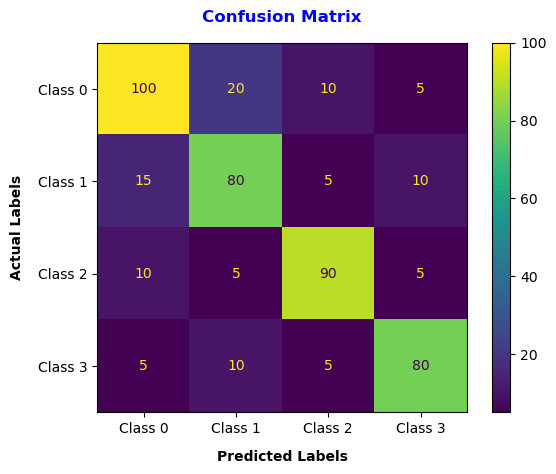

In [94]:
class_names = ["Class 0", "Class 1", "Class 2", "Class 3"]

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title('Coinfusin matrix')

# Make axis labels bold
plt.xlabel("Predicted Labels", fontsize=10, fontweight="bold", labelpad=10)
plt.ylabel("Actual Labels", fontsize=10, fontweight="bold", labelpad=10)
plt.title("Confusion Matrix",  fontweight="bold", color='blue', pad=15)


plt.show()

### Other metrics

First, lets' remember the formulas:

In [100]:
def calculate_metrics_multiclass(y_true, y_pred, average):
    """
    Calculate various classification metrics for multiclass classification.

    This function computes the following metrics for multiclass classification:
    - Accuracy
    - Precision (macro/micro/weighted average, based on the 'average' parameter)
    - Recall (macro/micro/weighted average, based on the 'average' parameter)
    - F1 Score (macro/micro/weighted average, based on the 'average' parameter)
    - F0.5 Score (F-beta with beta=0.5, macro/micro/weighted average)
    - F2 Score (F-beta with beta=2, macro/micro/weighted average)
    - False Positive Rate (FPR) (macro average across all classes)

    Parameters:
    y_true (array-like): True class labels.
    y_pred (array-like): Predicted class labels.
    average (str): The type of averaging to perform on metrics. Options are:
                   'micro', 'macro', 'weighted', or None.

    Returns:
    tuple: A tuple containing the calculated metrics in the following order:
           (accuracy, precision, recall, false_positive_rate, f1_score, f0_5_score, f2_score)
    """
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average, zero_division=1)
    recall = recall_score(y_true, y_pred, average=average, zero_division=1)
    f1 = f1_score(y_true, y_pred, average=average)
    f0_5 = fbeta_score(y_true, y_pred, beta=0.5, average=average)
    f2 = fbeta_score(y_true, y_pred, beta=2, average=average)

    # Calculate False Positive Rate (FPR) for each class
    fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  # False Positives per class
    tn = conf_matrix.sum() - (conf_matrix.sum(axis=1) + conf_matrix.sum(axis=0) - np.diag(conf_matrix))  # True Negatives per class
    fpr = (fp / (fp + tn)).mean()  # Macro-average FPR
    
    # return
    return accuracy, precision, recall, fpr, f1, f0_5, f2
    

In [101]:
calculate_metrics_multiclass(y_true, y_pred, 'macro')

(0.7692307692307693,
 0.7707661903314078,
 0.7715488215488215,
 0.07737707950602163,
 0.7710024776062513,
 0.7708237456931712,
 0.7712927989047391)

In [102]:
calculate_metrics_multiclass(y_true, y_pred, 'micro')

(0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.07737707950602163,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693)

In [103]:
calculate_metrics_multiclass(y_true, y_pred, 'weighted')

(0.7692307692307693,
 0.7700393252232717,
 0.7692307692307693,
 0.07737707950602163,
 0.7694703619231921,
 0.7697723463091081,
 0.7692869185406499)

<a name="references"></a>
## <font color='blue'> References </font>

[ScikitLearn Documentation](https://scikit-learn.sourceforge.net/stable/documentation.html)